## Random Forest

This is working now for valid_data. Change this to the correct dataset later then add more samples to this row later:

shap_samples = shap.sample(valid_data_x, 10)

In [1]:
# Load and combine datasets
import pandas as pd
from scipy.sparse import load_npz
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
import pickle

valid_data_x_sparse = load_npz('valid_data_x_sparse.npz')
valid_data_x_dense = pd.read_csv('valid_data_x_dense.csv')
valid_data_y = pd.read_csv('valid_data_y.csv')

with open('sparse_matrices_feature_names.pkl', 'rb') as f:
    sparse_matrices_feature_names = pickle.load(f)

valid_data_x = hstack([valid_data_x_sparse, csr_matrix(valid_data_x_dense.values)]).toarray()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(valid_data_x, valid_data_y.values.ravel())

""" # Change this to the correct dataset
valid_data_y_pred = rf_classifier.predict(valid_data_x)
print('Accuracy: ', accuracy_score(valid_data_y, valid_data_y_pred))
"""
"""
with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)
print('Model trained and saved')
"""

"\nwith open('rf_classifier.pkl', 'wb') as f:\n    pickle.dump(rf_classifier, f)\nprint('Model trained and saved')\n"

100%|██████████| 10/10 [01:43<00:00, 10.37s/it]


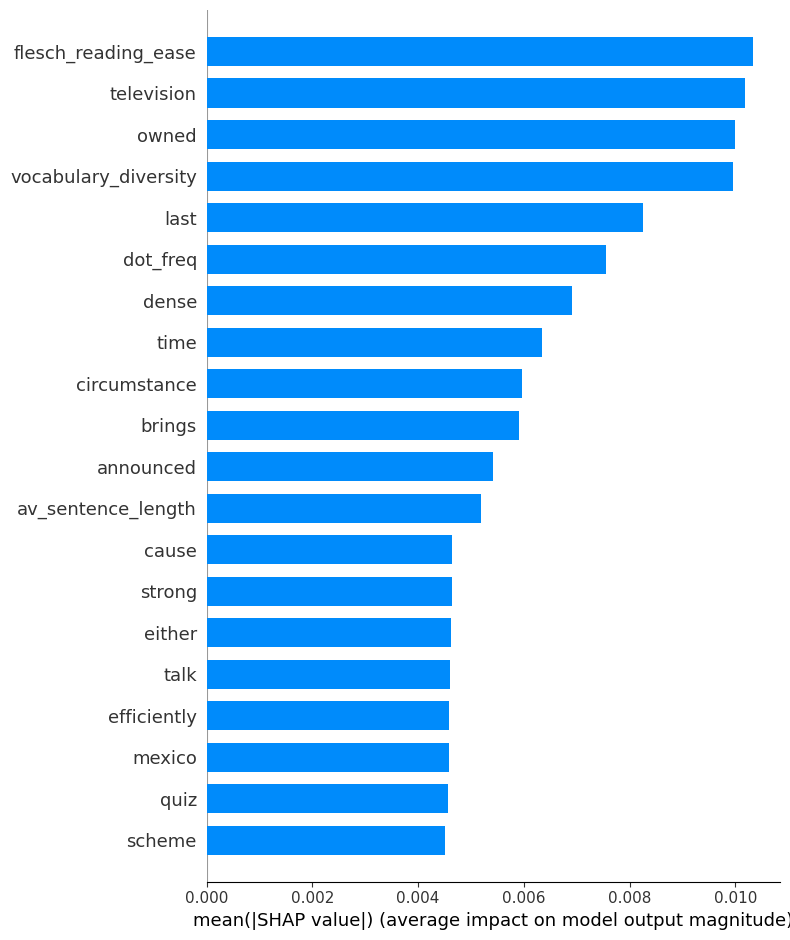

In [10]:
# Use Shap to explain the model
import shap

shap_samples = shap.sample(valid_data_x, 10) # Should be increased later!! 
explainer = shap.KernelExplainer(rf_classifier.predict, shap_samples)
shap_values = explainer.shap_values(shap_samples, num_workers=8)

feature_names=list(sparse_matrices_feature_names) + list(valid_data_x_dense.columns)
shap.summary_plot(shap_values, features=valid_data_x, plot_type='bar', feature_names=feature_names)